# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculations(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

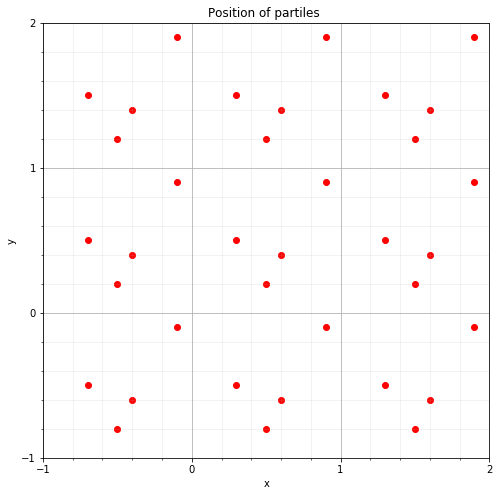

19070318.37682746

In [4]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [5]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

Text(0, 0.5, 'Potential')

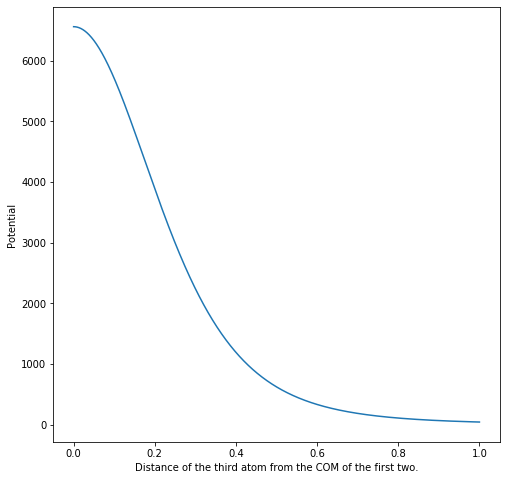

In [6]:
atoms = [np.array([0.0, 0.0]), np.array([1.0, 0.0])]

yCoordinates = np.linspace(0, 1, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrio(getTriangleLengths(atoms[0], atoms[1], np.array([0.5, yCoordinate]))))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of the third atom from the COM of the first two.')
ax.set_ylabel('Potential')

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2.0008087158203124e-06, 4.003000259399414e-05, 0.00011171674728393555, 0.0002340841293334961, 0.00035991239547729495, 0.0005361213684082031, 0.0007595367431640625, 0.0010083036422729491, 0.001300602436065674, 0.001615936756134033]


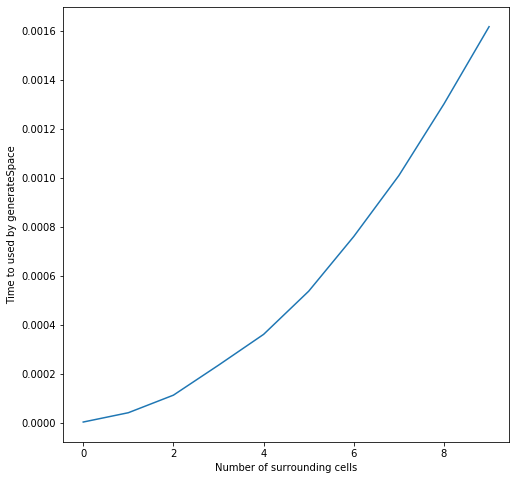

In [7]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 10)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')

print(xVariable)
print(yVariable)

In [8]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

16.2 µs ± 71.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Calculating with 0 surrounding cells.
0.00033354759216308594
Calculating with 1 surrounding cells.
0.03151893615722656
Calculating with 2 surrounding cells.
0.2464613914489746
Calculating with 3 surrounding cells.
0.971011241277059
Calculating with 4 surrounding cells.
2.7456701596577964
Calculating with 5 surrounding cells.
6.041277488072713
Calculating with 6 surrounding cells.
12.034347852071127
Calculating with 7 surrounding cells.
21.243045647939045
Calculating with 8 surrounding cells.
34.84870958328247
Calculating with 9 surrounding cells.
55.131725549697876

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.00033354759216308594, 0.03151893615722656, 0.2464613914489746, 0.971011241277059, 2.7456701596577964, 6.041277488072713, 12.034347852071127, 21.243045647939045, 34.84870958328247, 55.131725549697876]
[5.9999999999999995e-05, 0.0327, 0.2823, 1.1175, 3.0912599999999997, 6.94086, 13.5879, 24.138299999999997, 39.882299999999994, 62.294459999999994]


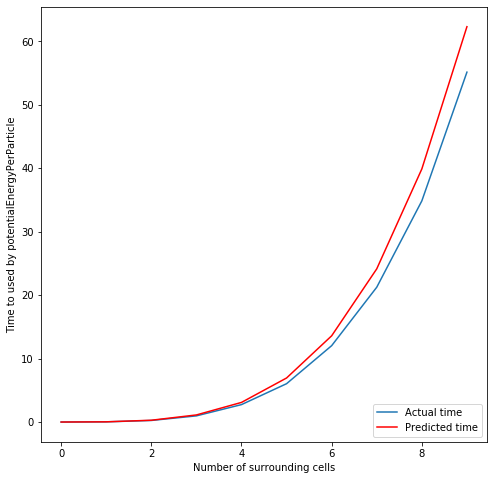

In [9]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 1.0), random.uniform(0, 1.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 10)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')

print(xVariable)
print(yVariable)
print([predictedCalculationTime(i, 4) for i in xVariable])

## Checking convergence

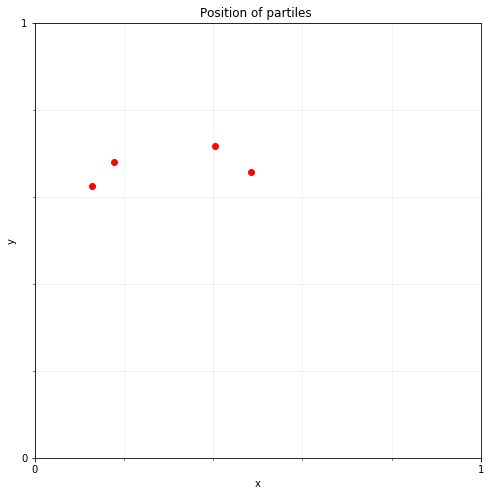

Calculating with 0 surrounding cells.
0.0
Calculating with 1 surrounding cells.
0.03201603889465332
Calculating with 2 surrounding cells.
0.24805879592895508
Calculating with 3 surrounding cells.
0.9756293296813965
Calculating with 4 surrounding cells.
2.6937499046325684
Calculating with 5 surrounding cells.
6.0761590003967285
Calculating with 6 surrounding cells.
11.96693468093872
Calculating with 7 surrounding cells.
21.35478115081787


Text(0, 0.5, 'Time needed for the calculation (seconds)')

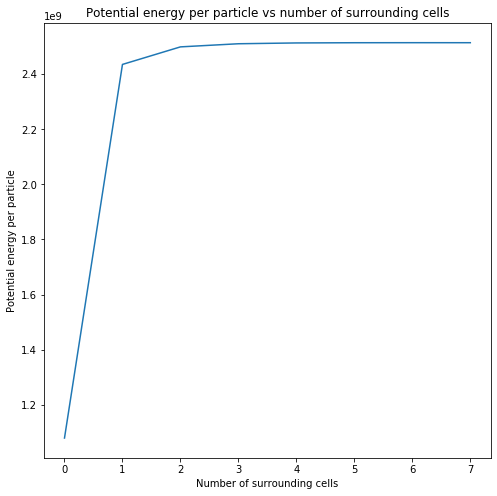

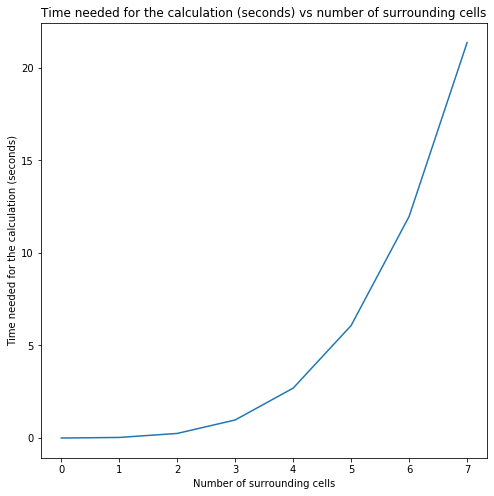

In [10]:
numberOfSurroundingCells = [i for i in range(0,8)]

potentialEnergyResults = []
timeForCalculation = []

atoms = [np.array([random.uniform(0, 1.0), random.uniform(0, 1.0)]) for j in range(0, 4)]

plotLattice(atoms)

for i in numberOfSurroundingCells:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, 1.0)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio))
    timeEnd = time.time()
    print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')

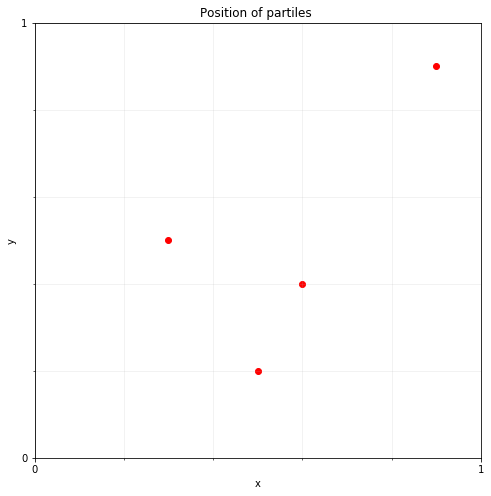

Calculating with 0 surrounding cells.
0.0
Calculating with 1 surrounding cells.
0.030007123947143555
Calculating with 2 surrounding cells.
0.24921584129333496
Calculating with 3 surrounding cells.
0.9782609939575195
Calculating with 4 surrounding cells.
2.7111246585845947
Calculating with 5 surrounding cells.
6.133795738220215
Calculating with 6 surrounding cells.
12.119082927703857
Calculating with 7 surrounding cells.
21.571271896362305
Calculating with 8 surrounding cells.
36.6419243812561
Calculating with 9 surrounding cells.
57.28824329376221


Text(0, 0.5, 'Time needed for the calculation (seconds)')

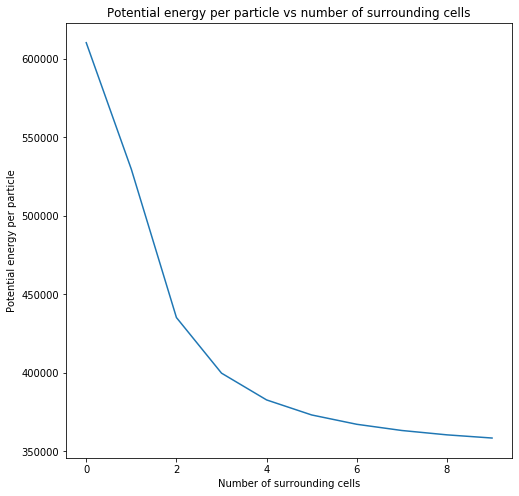

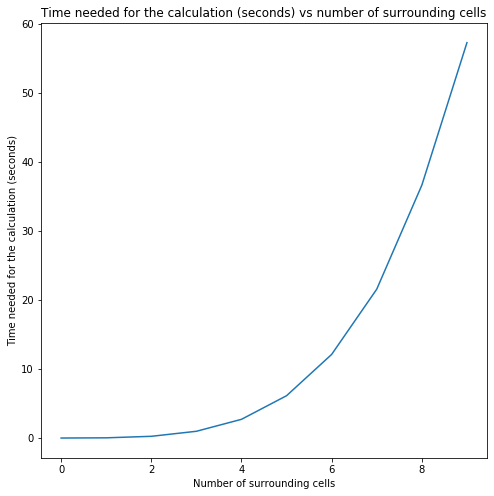

In [11]:
numberOfSurroundingCells = [i for i in range(0,10)]

potentialEnergyResults = []
timeForCalculation = []

atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

plotLattice(atoms)

for i in numberOfSurroundingCells:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, 1.0)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio))
    timeEnd = time.time()
    print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')